# Julia Basics

This document is derived from [JuliaBox's tutorial](https://github.com/JuliaComputing/JuliaBoxTutorials/tree/master/introductory-tutorials/intro-to-julia).

Julia is a dynamic language.  You don't need type declarations, and can change variable types dynamically and interactively.

For working with simple numbers, arrays, and strings, its syntax is *superficially* similar to Matlab, Python, and other popular languages.

In order to execute the "In" cells, select the cell and press Shift-Enter, or press the Play button above. To run the entire notebook, navigate to Cell and then click Run All.

The Jupyter Notebook can mix code, multimedia results, headings, documentation, equations like $\sqrt{\int x^2 dx}$, and even interactive widgets.

Julia documentation https://docs.julialang.org/en/stable/ is a very useful reference.

In the Jupyter Notebook Enter the command mode by Esc. Use `Esc+h` for help.   One useful command is `Esc+l`, which toggles the **line number**.

In this class, everyone who chooses to use Julia **MUST use Julia v1.6.2**

**Last revision**: 08/24/2021

In [21]:
A = rand(10,300)

10×300 Matrix{Float64}:
 0.768017   0.511314   0.593528   …  0.0704898  0.269344   0.361316
 0.304866   0.90054    0.0216101     0.0363631  0.713078   0.767664
 0.0469318  0.692011   0.928939      0.204198   0.56108    0.440498
 0.71596    0.424243   0.841576      0.987009   0.522023   0.805189
 0.675864   0.517954   0.11823       0.740327   0.763859   0.672887
 0.998547   0.39521    0.0388177  …  0.755096   0.539394   0.649966
 0.924615   0.0805134  0.569356      0.480065   0.593286   0.311418
 0.317082   0.0495257  0.484497      0.934951   0.887219   0.156801
 0.316819   0.490232   0.942788      0.663434   0.568906   0.903451
 0.168399   0.126048   0.9102        0.938927   0.0390003  0.169792

It has all of the usual built-in Matlab/Numpy-like linear-algebra and vector functions:

In [41]:
# Basic linear algebra routines are in the LinearAlgebra package (no need to install separately)
using LinearAlgebra


b = rand(10) # a random rank-10 vector
x = A \ b    # solve for x satisfying A*x = b; has rank 300
B = A' * A   # A-transpose multiplied by A; is a 300x300 symmetrix matrix with real eigenvalues
eB = eigvals(B)

300-element Vector{Float64}:
  -2.645596701758998e-13
  -2.206841087419368e-13
  -1.4746675521899343e-13
  -1.2819181302718518e-13
  -1.0932621842256571e-13
  -9.023582189924065e-14
  -7.418462836656684e-14
  -5.791623469711373e-14
  -4.4510829586389385e-14
  -3.547239091376797e-14
  -3.4348678362557517e-14
  -3.257194051647358e-14
  -2.395976727907779e-14
   ⋮
   1.9045691024176524e-13
   3.3260997104750063e-13
  18.087367286652746
  19.4957652442722
  22.44420906068181
  24.8856185586373
  25.420226122238123
  27.28114385119196
  27.921145754876644
  28.80376811132188
  30.17365430765615
 766.700750616208

It also supports convenient vectorisation of functions using the `.` operator:

In [42]:
#]add SpecialFunctions
using SpecialFunctions

println(size(x))

# @. is a macro that vectorizes the line
# equivalent to adding vectorization to each operation
# eB .- 2x.^2 .+ 4x .- 6

@. eB - 2x^2 + 4x - 6

(300,)


300-element Vector{Float64}:
  -6.011711707735319
  -5.938694517027412
  -6.020622427869528
  -5.994447122181338
  -5.954418042445003
  -5.979185251477187
  -5.983375991852965
  -5.993816119382069
  -6.011981379791672
  -5.991916137213968
  -5.983518997846363
  -5.9618140630332395
  -6.007612682767336
   ⋮
  -5.922927419058204
  -6.02621974354205
  12.066569880321506
  13.56384885566856
  16.39752620118949
  18.899929009618436
  19.421458697341926
  21.267253169509395
  21.87510417432607
  22.77506401123045
  24.17772439972886
 760.7226680779221

Complex numbers and arbitrary-precision arithmetic (via MPFR) are available, of course.

In [43]:
cos(big(3 + 4im))

-27.03494560307422464769480266827091348467753695567661661019265514673434246483996 - 3.851153334811777536563337123053124569704160846091637003157728595256494186490506im

## Unicode

All strings are UTF-8 encoded Unicode by default (UTF-16 and UTF-32 also supported):

In [44]:
# regex search of a Unicode string
# This replaces the old matchall function
collect((m.match for m = eachmatch(r"\s[a-z]+", "α is a Grëék letter"))) 

3-element Vector{SubString{String}}:
 " is"
 " a"
 " letter"

Like Python 3, variable names can be Unicode, but Julia allows a somewhat wider range of codepoints in identifiers, which can be typed by LaTeX-like tab-completion *\hat[TAB]\alpha[TAB]*.

In [45]:
α̂= 7
ħ = 6.62606957e-34 / 2π
ẋ = ħ *α̂

7.3820020773540256e-34

Unlike Python 3, Unicode math operators are parsed as infix operators, which are available for user-defined meanings:

In [27]:
≪(x,y) = x < 0.1*y
50 ≪ 100, 5 ≪ 100, 5 ≤ 50

(false, true, true)

In [28]:
const ⊗ = kron

# Note that eye(N,N) is deprecated for representing the identity matrix

Matrix(I,2,2) ⊗ rand(2,2)

4×4 Matrix{Float64}:
 0.981006  0.0794158  0.0       0.0
 0.155269  0.692818   0.0       0.0
 0.0       0.0        0.981006  0.0794158
 0.0       0.0        0.155269  0.692818

## Functions and JIT-compilation

Functions can be defined in several ways, and *don't require type-declarations*.

In [46]:
# verbose form:
function foo(x)
    return x + 1
end

# one-line form:
foobar(x) = x + 2

# anonymous function
x -> x + 3

#11 (generic function with 1 method)

In [30]:
foo(3) # compiles foo for Int arguments

4

In [31]:
foo(7) # re-uses compiled foo(Int)

8

In [32]:
foo(7.3) # compiles a different version for Float64 arguments

8.3

In [47]:
# Use vectorization

@. foo([1,2,7,9]) 

4-element Vector{Int64}:
  2
  3
  8
 10

# Plotting in Julia

We will use the PyPlot package to plot with Julia. This notebook has a few examples to get you started. The [PyPlot.jl](https://github.com/stevengj/PyPlot.jl) site has excellent documentation for plotting.

Loading the PyPlot module may take a few seconds.

In general, all of the arguments, including keyword arguments, are exactly the same as in Python. (With minor translations, of course, e.g. Julia uses `true` and `nothing` instead of Python's `True` and `None`.)

The full matplotlib.pyplot API is far too extensive to describe here; see the [matplotlib.pyplot documentation](http://matplotlib.org/api/pyplot_api.html) for more information. The Matplotlib version number is returned by PyPlot.version.


In [48]:
#]add PyPlot
using PyPlot

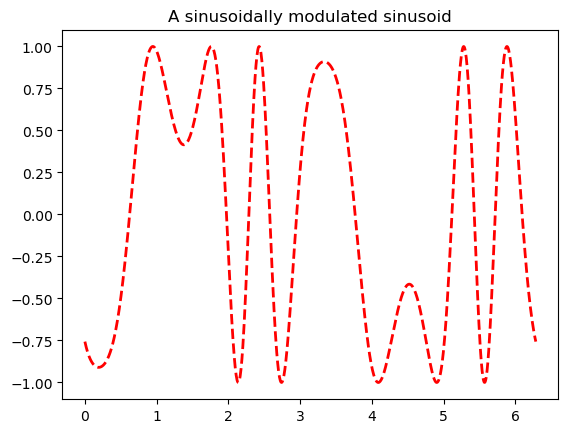

PyObject Text(0.5, 1.0, 'A sinusoidally modulated sinusoid')

In [49]:
# range plays the role of linspace starting from v0.7.0

x = range(0,stop=2*pi,length=1000)
y = similar(x)
@. y = sin(3*x + 4*cos(2*x))

plot(x, y, color="red", linewidth=2.0, linestyle="--")
title("A sinusoidally modulated sinusoid")

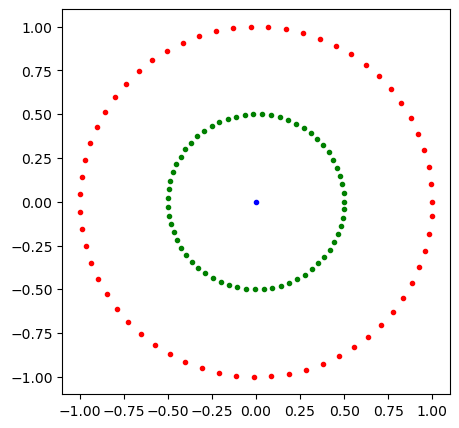

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x000000006E830CA0>

In [50]:
# Draw (x, y) points
figure(figsize=(5, 5))
θ = collect(0:0.1:2π)
plot(0,0,"b.")
plot(cos.(θ), sin.(θ), "r.")
plot(0.5cos.(θ), 0.5sin.(θ), "g.")

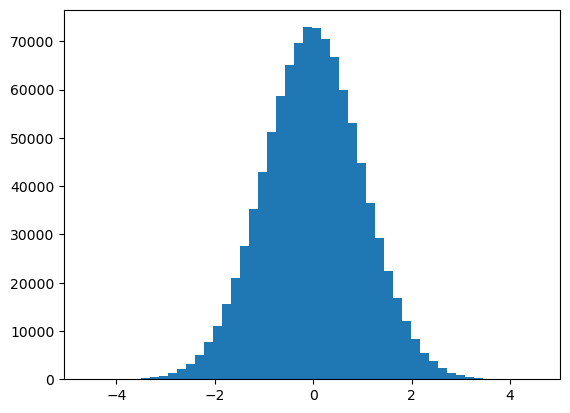

In [37]:
# Draw a histogram

y = randn(10^6)
hist(y, 50);    

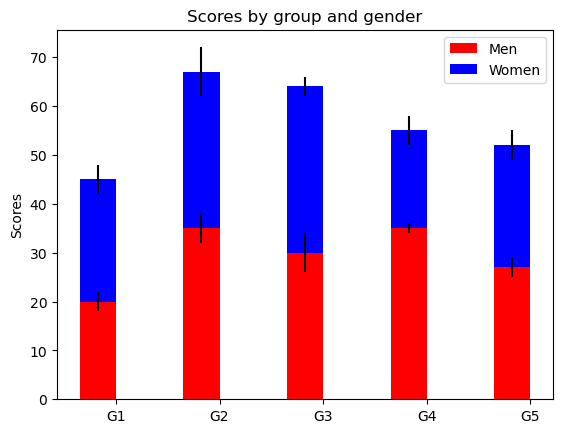

PyObject <matplotlib.legend.Legend object at 0x000000006E85F4F0>

In [51]:
# Draw a stacked bar chart

N = 5
menMeans   = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd     = (2, 3, 4, 1, 2)
womenStd   = (3, 5, 2, 3, 3)
ind = 1:N    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = PyPlot.bar(ind, menMeans, width, color="r", yerr=menStd)
p2 = PyPlot.bar(ind, womenMeans, width, bottom=menMeans, color="b", yerr=womenStd)

ylabel("Scores")
title("Scores by group and gender")
xticks(ind .+ width/2., ("G1", "G2", "G3", "G4", "G5") )
legend( (p1[1], p2[1]), ("Men", "Women") )


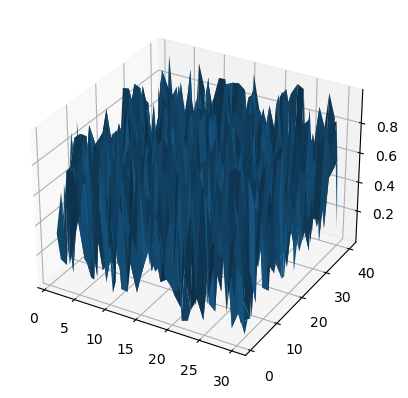

sys:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().


PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000001E5B6A0>

In [52]:
# Plot a random surface

surf(rand(30,40))